# WeatherPy

Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | caleta de carquin
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | moya
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | poronaysk
Processing Record 9 of Set 1 | sanya
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | luganville
Processing Record 13 of Set 1 | vryburg
Processing Record 14 of Set 1 | nagqu
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | port blair
Processing Record 17 of Set 1 | vadso
Processing Record 18 of Set 1 | thief river falls
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | kuqa
Processing Record 21 of Set 1 | nemuro
Processing Record 22 of Set 1 | usogorsk
Processing Record 23 of Set 1 

Processing Record 42 of Set 4 | zheshart
Processing Record 43 of Set 4 | sandnessjoen
Processing Record 44 of Set 4 | copala
Processing Record 45 of Set 4 | kapa'a
Processing Record 46 of Set 4 | bourbon-lancy
Processing Record 47 of Set 4 | klyuchi
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | naze
Processing Record 0 of Set 5 | kerikeri
Processing Record 1 of Set 5 | emerald
Processing Record 2 of Set 5 | viedma
Processing Record 3 of Set 5 | chos malal
Processing Record 4 of Set 5 | el bauga
Processing Record 5 of Set 5 | tazovsky
Processing Record 6 of Set 5 | iskateley
Processing Record 7 of Set 5 | tazacorte
Processing Record 8 of Set 5 | bornos
Processing Record 9 of Set 5 | walvis bay
Processing Record 10 of Set 5 | turinskaya sloboda
Processing Record 11 of Set 5 | mount isa
Processing Record 12 of Set 5 | general pico
Processing Record 13 of Set 5 | thinadhoo
Processing Record 14 of Set 5 | magadan
Processing Record 15 of Set 5 | la ronge
Proc

Processing Record 36 of Set 8 | muisne
Processing Record 37 of Set 8 | mount pearl
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | usinsk
Processing Record 40 of Set 8 | palencia
Processing Record 41 of Set 8 | przasnysz
Processing Record 42 of Set 8 | sevastopol
Processing Record 43 of Set 8 | suva
Processing Record 44 of Set 8 | hirara
Processing Record 45 of Set 8 | springbok
Processing Record 46 of Set 8 | antsiranana
Processing Record 47 of Set 8 | korla
Processing Record 48 of Set 8 | kone
Processing Record 49 of Set 8 | saudarkrokur
Processing Record 0 of Set 9 | najran
Processing Record 1 of Set 9 | vanimo
Processing Record 2 of Set 9 | gamboma
Processing Record 3 of Set 9 | saint-francois
Processing Record 4 of Set 9 | nuuk
Processing Record 5 of Set 9 | weno
Processing Record 6 of Set 9 | takoradi
Processing Record 7 of Set 9 | dakhla
Processing Record 8 of Set 9 | nyakahanga
Processing Record 9 of Set 9 | tambo
Processing Record 10 of Set 9 | zambezi
P

Processing Record 24 of Set 12 | lata
Processing Record 25 of Set 12 | samamea
City not found. Skipping...
Processing Record 26 of Set 12 | tabou
Processing Record 27 of Set 12 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 28 of Set 12 | aden
Processing Record 29 of Set 12 | sebezh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,caleta de carquin,-11.0925,-77.6267,67.46,83,100,9.37,PE,1697339027
1,hermanus,-34.4187,19.2345,59.07,76,98,16.67,ZA,1697339027
2,ilulissat,69.2167,-51.1000,17.62,79,20,9.22,GL,1697339027
3,moya,28.0906,-15.5883,78.67,48,73,5.53,ES,1697339027
4,adamstown,-25.0660,-130.1015,70.99,80,96,5.61,PN,1697339027


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,caleta de carquin,-11.0925,-77.6267,67.46,83,100,9.37,PE,1697339027
1,hermanus,-34.4187,19.2345,59.07,76,98,16.67,ZA,1697339027
2,ilulissat,69.2167,-51.1000,17.62,79,20,9.22,GL,1697339027
3,moya,28.0906,-15.5883,78.67,48,73,5.53,ES,1697339027
4,adamstown,-25.0660,-130.1015,70.99,80,96,5.61,PN,1697339027


# Create the Scatter Plots Requested

Latitude Vs. Temperature

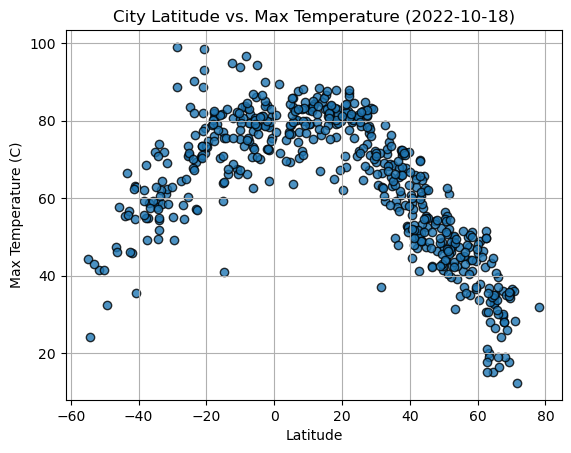

In [9]:
# Build scatter plot for latitude vs. temperature
lat_p = city_data_df["Lat"]
max_temp_p = city_data_df["Max Temp"]
humidity_p = city_data_df["Humidity"]
cloudiness_p = city_data_df["Cloudiness"]
wind_speed_p = city_data_df["Wind Speed"]

plt.scatter(lat_p,
            max_temp_p,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

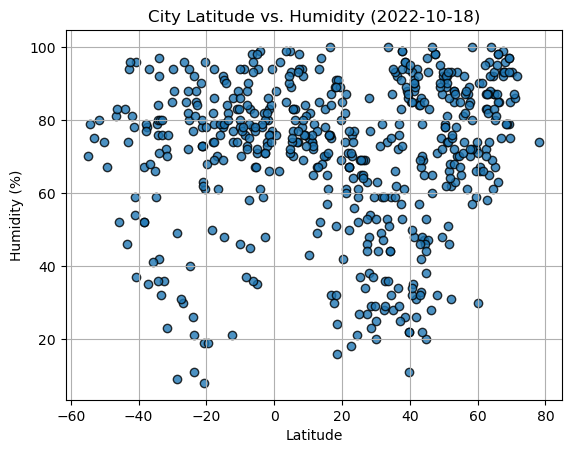

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat_p,
            humidity_p,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

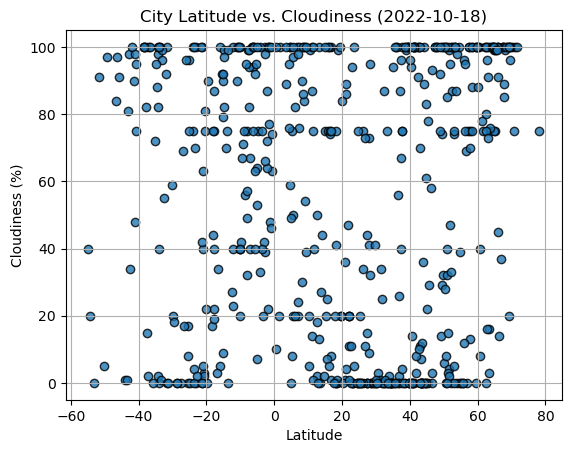

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat_p,
            cloudiness_p,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

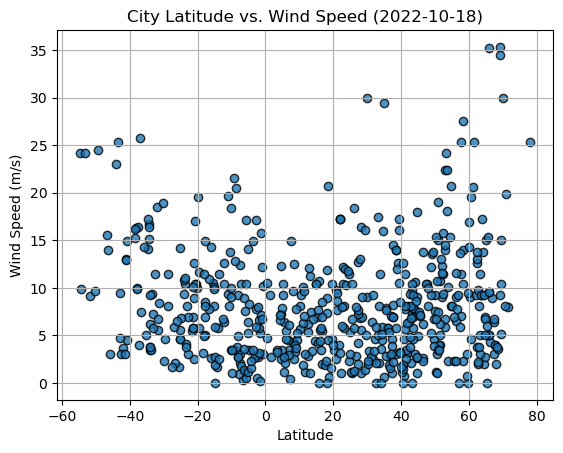

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat_p,
            wind_speed_p,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ilulissat,69.2167,-51.1000,17.62,79,20,9.22,GL,1697339027
3,moya,28.0906,-15.5883,78.67,48,73,5.53,ES,1697339027
5,utrik,11.2278,169.8474,82.90,74,14,10.09,MH,1697339027
7,poronaysk,49.2167,143.1167,52.29,75,14,13.56,RU,1697339028
8,sanya,18.2431,109.5050,87.96,51,0,8.95,CN,1697339028


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
city_data_df.loc[(city_data_df["Lat"] < 0)].head()
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,caleta de carquin,-11.0925,-77.6267,67.46,83,100,9.37,PE,1697339027
1,hermanus,-34.4187,19.2345,59.07,76,98,16.67,ZA,1697339027
4,adamstown,-25.0660,-130.1015,70.99,80,96,5.61,PN,1697339027
6,coquimbo,-29.9533,-71.3436,55.13,94,20,2.30,CL,1697338811
10,puerto ayora,-0.7393,-90.3518,75.54,94,63,3.00,EC,1697338981


Temperature vs. Latitude Linear Regression Plot

The r-squared value is 0.81


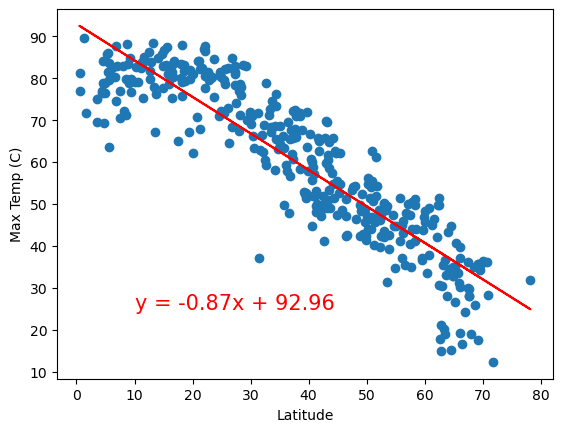

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

correlation = st.pearsonr(x_values, y_values) 
print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

plot_linear_regression(x_values, y_values, title=
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       y_label='Max Temp (C)', text_coordinates=(10,25))


The r-squared value is 0.52


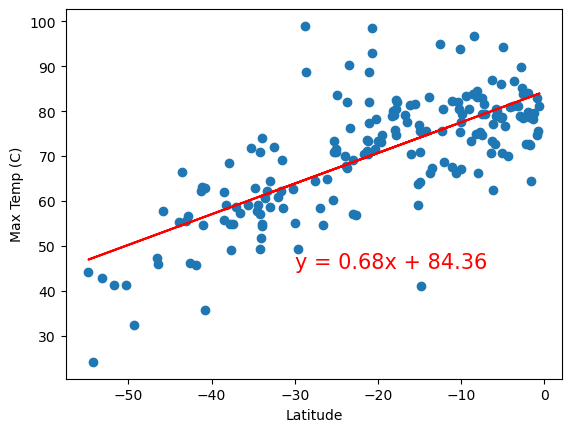

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

correlation = st.pearsonr(x_values, y_values) 
print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp (C)',(-30,45))

Discussion about the linear relationship: There is a positive correlation between latitude and temperature in the Southern Hemisphere. The positive slope indicates that, as the latitude increases, the temperature also increases. On the other hand, the Northern Hemisphere shows a negative correlation. The negative slope indicates that, as the latitude increases, the temperature decreases.

Humidity vs. Latitude Linear Regression Plot

The r-squared value is 0.02


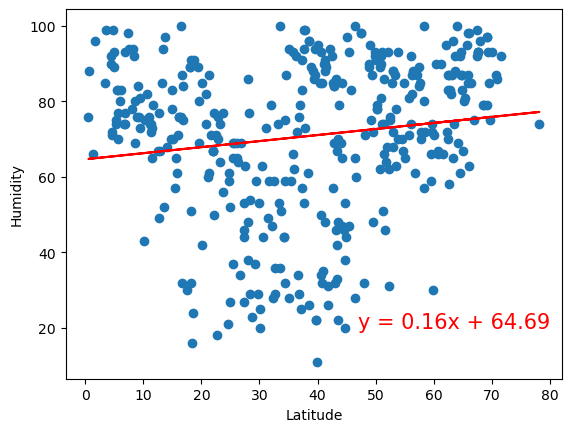

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

correlation = st.pearsonr(x_values, y_values) 
print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 'Humidity',(47,20))

The r-squared value is 0.02


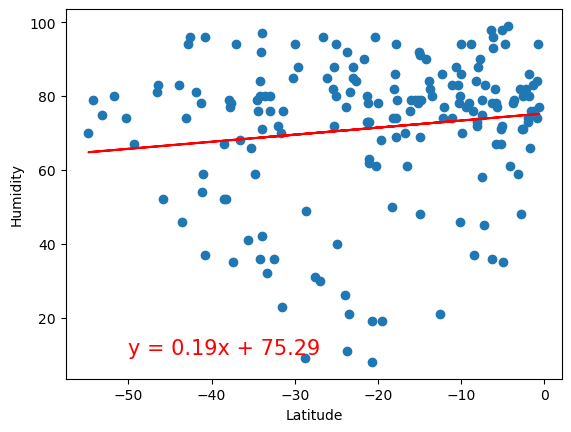

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

correlation = st.pearsonr(x_values, y_values) 
print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 'Humidity',(-50,10))

Discussion about the linear relationship: There is a positive correlation between latitude and humidity in both the Southern and Northern Hemispheres. The positive slope indicates that, as the latitude increases, the humidity also increases, but the correlation is somewhat weak. The two charts above show positive relationship, but there is not a very steep increase in humidity for each unit increase in latitude.

Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is 0.05


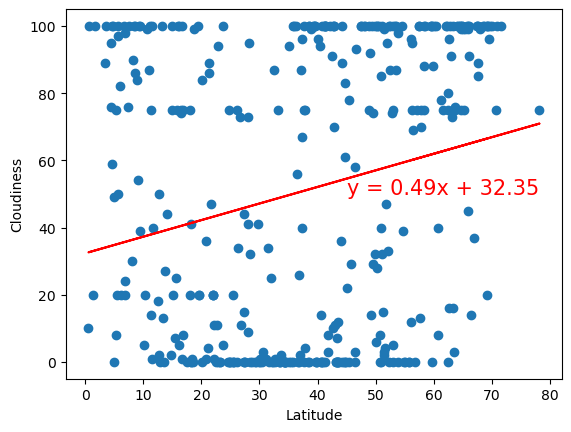

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

correlation = st.pearsonr(x_values, y_values) 
print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness',(45,50))

The r-squared value is 0.01


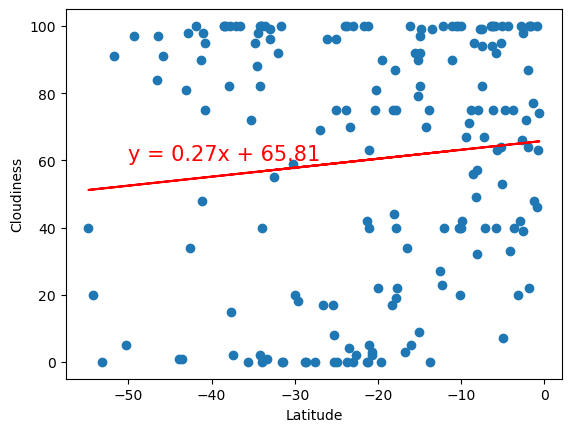

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

correlation = st.pearsonr(x_values, y_values) 
print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 'Cloudiness',(-50,60))

Discussion about the linear relationship: There is a positive correlation between latitude and cloudiness in both the Southern and Northern Hemispheres. The positive slope indicates that, as the latitude increases, the cloudiness also increases. The two charts above both show positive relationship, but the Northern Hemisphere has a stronger correlation than the Southern Hemisphere.

Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is 0.07


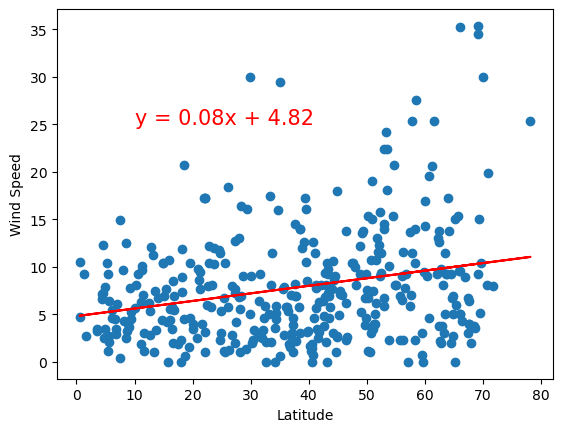

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

correlation = st.pearsonr(x_values, y_values) 
print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,25))

The r-squared value is 0.12


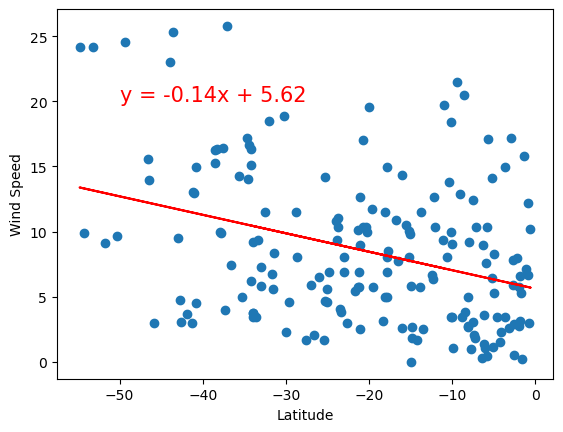

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

correlation = st.pearsonr(x_values, y_values) 
print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))

Discussion about the linear relationship: While there is a positive correlation between latitude and wind speed in the Nothern Hemisphere, the Southern Hemisphere shows a negative correlation. However, the two correlations are considered to be weak.